# Continuos Control Project 



## 0. Setup

To run any of the parts below 1,2,3. You need to have executed this section first.
                    

Import **TheAgent class** ( requires agent.py , envhelper.py and models.py in same directory as this, or findable  ). Along with other dependencies as outlined in the README.MD of this repository.


In [1]:
# import from agent.py the class TheAgent
from agent import TheTrainer
# for ploting results 
import numpy as np
import matplotlib.pyplot as plt

Setup the hyper / network parameters

**Important** Set the constant AGENT_FILE to the correct unity ml_agent binary

In [2]:
class CONFIG_PARAMS(object):
    AGENT_FILE = './Reacher_Linux/Reacher.x86_64'
    N_STEPS = 8
    GAMMA = 0.99
    FC1_SIZE = 99
    FC2_SIZE = 99
    LR = 0.00025
    ENTROPY_WEIGHT = 0.001
    

## 1. Train The Agent

Train the agent by executing code cell below ( it may take a while ), it will use the hyperparamets given above.

On completion model weights are saved in 'model.pt' or whatever model_name you give to agent.train() .

Set viewer = True in agent.start if you want to view the environment during training.


In [3]:
# train the agent 
try:
    agent = TheTrainer( CONFIG_PARAMS )   # pass the agent environment 
    agent.start( viewer = False )   # start environment without viewer 
    scores = agent.train( max_episodes = 5000 , save_model_filename ='model.pth' )  # train agent with upto max_episodes
finally:
    agent.end()  


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


   10 ,    0.4830   0.0000
   20 ,    0.9930   0.0000
   30 ,    1.1035   0.0000
   40 ,    1.1065   0.0000
   50 ,    1.0080   0.0000
   60 ,    0.3085   0.0000
   70 ,    0.8425   0.0000
   80 ,    1.3170   0.0000
   90 ,    1.4620   0.0000
  100 ,    1.3410   0.9216
  110 ,    1.9400   1.0272
  120 ,    2.2540   1.1352
  130 ,    1.7085   1.2580
  140 ,    2.9300   1.4026
  150 ,    2.0565   1.5258
  160 ,    3.8060   1.7382
  170 ,    4.0060   2.0355
  180 ,    5.1030   2.3922
  190 ,    6.7715   2.8466
  200 ,    7.5895   3.4390
  210 ,    8.6760   4.1362
  220 ,   11.0175   4.9660
  230 ,    9.6015   5.8643
  240 ,   15.3145   7.1559
  250 ,   18.3070   8.5606
  260 ,   21.0825  10.0373
  270 ,   20.8140  11.5599
  280 ,   23.2240  13.3268
  290 ,   23.1205  15.0220
  300 ,   26.5685  16.7138
  310 ,   31.1305  18.5597
  320 ,   27.6175  20.5066
  330 ,   38.1310  22.8784
  340 ,   36.3420  24.9867
  350 ,   36.7790  26.7757
  360 ,   38.1925  28.7275
  367 ,   36.4580  30.0336
E

### Visualize Training Scores

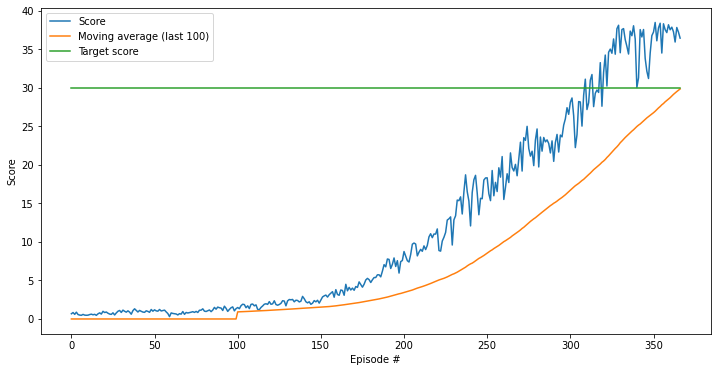

In [4]:
# compute a moving average over last 100 scores.
mavg = [ np.array( agent.scores[i-100:i]).sum() / 100 for i in range( 0 , len( agent.scores ))]
fig = plt.figure( figsize=(12,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(agent.scores)), agent.scores)
plt.plot(np.arange(len(mavg)) , mavg )
plt.plot(np.arange(len(agent.scores)), np.ones(len(agent.scores))*30 )
plt.legend( ['Score','Moving average (last 100)','Target score'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [5]:
 # delete agent 
try:
    del agent
except:
    pass

## 2. Validation Run

Make sure the trained model, actually still can obtain an average of >= 13 , over 100 episodes.
We use another fixed seed - so we are not generating the same first 100 episodes that we trained on.

In [3]:
try:
    agent = TheTrainer( CONFIG_PARAMS  )  
    agent.start( viewer = False , seed= 54321 )    
    agent.load_model( 'model.pth')
    agent.play( 100 , train_mode = True ) 
finally:
    agent.end()  

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Visualize Validation Scores

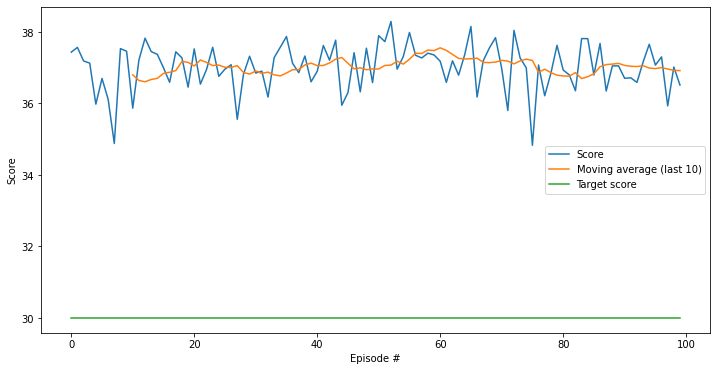

In [4]:
# PLOT 
mavg = [ np.array( agent.scores[i-10:i]).sum() / 10  for i in range( 10 , len( agent.scores))] 
fig = plt.figure( figsize=(12,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(agent.scores)), agent.scores)
plt.plot(np.arange(len(mavg)) + 10 , mavg )
plt.plot(np.arange(len(agent.scores)), np.ones(len(agent.scores))*30 )
plt.legend( ['Score','Moving average (last 10)','Target score'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [ ]:
try:
    del agent
except:
    pass

## 3. Play

Set agent.start( viewer = False ) if no graphics required.

NB: We set the seed to something random ( to get a different play experience each time ), as during training we fix the randomness of the environment - so we can better see that effects of tweaking the hyper parameters.

In [ ]:
try:
    agent = TheTrainer( CONFIG_PARAMS )  
    agent.start( viewer = True , seed=np.random.RandomState(None).randint(50000)  )     
    agent.load_model( 'model.pth')
    agent.play( 100,  train_mode = True  ) 
    print ( f'Score { np.mean(agent.scores)  }' )

finally:
    agent.end() 
    pass

In [ ]:
# delete the agent
try:
    del agent
except:
    pass